<a href="https://colab.research.google.com/github/drAshcroft/MAT422/blob/main/HW_2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy.stats import lognorm,norm

The lognorm distrubution describes many natural processes that have common events at low values and rare events as the independant increases.

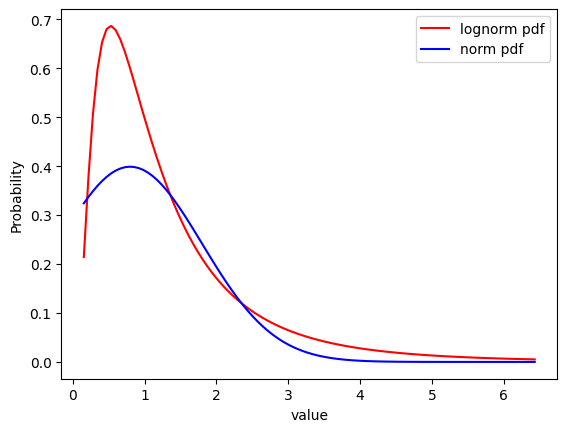

In [10]:
s = 0.8
x = np.linspace(lognorm.ppf(0.01, s),                lognorm.ppf(0.99, s), 100)  #use the low and high prob values to define the range
plt.plot(x, lognorm.pdf(x, s),       'r-', label='lognorm pdf')
plt.plot(x, norm.pdf(x, s),       'b-', label='norm pdf')
plt.legend()
plt.xlabel('value')
plt.ylabel('Probability')
plt.show()

In [6]:
mean, var, skew, kurt = lognorm.stats(s, moments='mvsk')
print('Difference from normal distribution' )
print(f'Mean:{mean:.2f}, Variance:{var:.2f}, Skew:{skew:.2f}, Kurtosis:{kurt:.2f}')

Difference from normal distribution
Mean:1.38, Variance:1.70, Skew:3.69, Kurtosis:31.37


We can also use programming to determine the distribution of data and determine the statistical properties of the data

In [16]:
from scipy.stats import moment

rng = np.random.default_rng()

#generate a sizeable number of data with a uniform and normal distribution
uniform=rng.random(50000)
normal = rng.standard_normal(50000)
lognormal = rng.lognormal(0, s, 50000)

mean, var, skew, kurt = moment(uniform, moment=0),moment(uniform, moment=1),moment(uniform, moment=2),moment(uniform, moment=3)
print('Uniform dataset statistical properties')
print(f'Mean:{mean:.2f}, Variance:{var:.2f}, Skew:{skew:.2f}, Kurtosis:{kurt:.2f}')


mean, var, skew, kurt = moment(normal, moment=0),moment(normal, moment=1),moment(normal, moment=2),moment(normal, moment=3)
print('\nNormal dataset statistical properties')
print(f'Mean:{mean:.2f}, Variance:{var:.2f}, Skew:{skew:.2f}, Kurtosis:{kurt:.2f}')

mean, var, skew, kurt = moment(lognormal, moment=0),moment(lognormal, moment=1),moment(lognormal, moment=2),moment(lognormal, moment=3)
print('\nLognormal dataset statistical properties')
print(f'Mean:{mean:.2f}, Variance:{var:.2f}, Skew:{skew:.2f}, Kurtosis:{kurt:.2f}')


Uniform dataset statistical properties
Mean:1.00, Variance:0.00, Skew:0.08, Kurtosis:0.00

Normal dataset statistical properties
Mean:1.00, Variance:0.00, Skew:0.99, Kurtosis:0.00

Lognormal dataset statistical properties
Mean:1.00, Variance:0.00, Skew:1.67, Kurtosis:8.43


The distributions can be plotted to show how the data is distributed and relate the abstract variables to the actual data

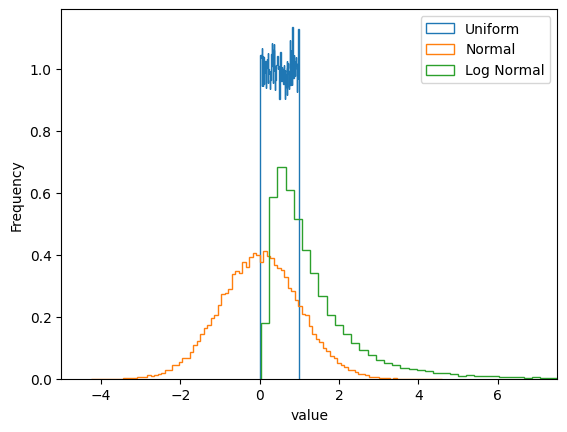

In [24]:
plt.hist( uniform,bins=100,histtype= 'step', density=True, label='Uniform')
plt.hist( normal,bins=100,histtype= 'step',  density=True,label='Normal')
plt.hist( lognormal,bins=200,histtype= 'step',  density=True,label='Log Normal')

plt.xlim([-5,7.5])
plt.legend()
plt.xlabel('value')
plt.ylabel('Frequency')
plt.show()